# Binomial Method for Option Pricing

### Packages
First import the packages we will use in this assignment. np.random.seed(1) is used to keep all the random function calls consistent.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import datetime as dt
np.random.seed(1)

## P1: Convergence Rate Comparison
For each evaluation using Monte Carlo method, we generate 10000 paths. And using time step of 0.001 uniformly.
* (a) Use the binomial method in which 
$$
u = \frac{1}{d}, d = c - \sqrt{c^2 -1}, c = \frac12 (e^{r\Delta}+e^{(r+\sigma^2)\Delta}), p = \frac{e^{r\Delta} - d}{u-d}
$$

* (b) Use the binomial method in which
$$
u = e^{r\Delta} (1 + \sqrt{e^{\sigma^2 \Delta} - 1}), d = e^{r\Delta} (1 - \sqrt{e^{\sigma^2 \Delta} - 1}), p = \frac12
$$

* (c) Use the binomial method in which
$$
u = exp\big( (r-\frac{\sigma^2}{2}\Delta + \sigma \sqrt{\Delta}) \big), d = exp\big( (r-\frac{\sigma^2}{2}\Delta - \sigma \sqrt{\Delta}) \big), p = \frac12
$$

* (d) Use the binomial method in which
$$
u = e^{\sigma \sqrt{\Delta}}, d = e^{-\sigma \sqrt{\Delta}}, p = \frac12 + \frac12 \Big( \frac{(r-\frac{\sigma^2}{2})\sqrt{\Delta}}{\sigma} \Big)
$$

In [2]:
T1, r1, sigma1 = 0.5, 0.05, 0.24
S1_0, X1 = 32, 30
n1 = np.array([10,20,40,80,100,200,500])

def binomial_a(T, r, sigma, S0, X, n):
    dlt = T / float(n)
    c = 0.5 * (np.exp(-r * dlt) + np.exp((r + sigma**2)*dlt))
    d = c - np.sqrt(c**2 - 1)
    u = 1 / d
    p = (np.exp(r*dlt) - d) / (u - d)
    q = 1 - p
    nseq = np.arange(int(n+1))
    pmf = lambda k: np.math.factorial(n)//np.math.factorial(n-k)//np.math.factorial(k)* p**k * q**(n-k) * np.maximum(S0* u**k * d**(n-k) -X, 0)
    vpmf = np.vectorize(pmf)
    return np.exp(-r*T)*np.sum(vpmf(nseq))
vfunc1 = np.vectorize(binomial_a)
p1a = vfunc1(T1, r1, sigma1, S1_0, X1, n1)

In [3]:
def binomial_b(T, r, sigma, S0, X, n):
    dlt = T / float(n)
    g = np.sqrt(np.exp(sigma**2 * dlt) - 1)
    u = np.exp(r*dlt) * (1 + g)
    d = np.exp(r*dlt) * (1 - g)
    p = 0.5
    nseq = np.arange(int(n+1))
    pmf = lambda k: np.math.factorial(n)//np.math.factorial(n-k)//np.math.factorial(k)* p**n * np.maximum(S0* u**k * d**(n-k) -X, 0)
    vpmf = np.vectorize(pmf)
    return np.exp(-r*T)*np.sum(vpmf(nseq))
vfunc2 = np.vectorize(binomial_b)
p1b = vfunc2(T1, r1, sigma1, S1_0, X1, n1)

In [4]:
def binomial_c(T, r, sigma, S0, X, n):
    dlt = T / float(n)
    g = (r - 0.5*sigma**2)*dlt
    u = np.exp(g + sigma * np.sqrt(dlt))
    d = np.exp(g - sigma * np.sqrt(dlt))
    p = 0.5
    nseq = np.arange(int(n+1))
    pmf = lambda k: np.math.factorial(n)//np.math.factorial(n-k)//np.math.factorial(k)* p**n * np.maximum(S0* u**k * d**(n-k) -X, 0)
    vpmf = np.vectorize(pmf)
    return np.exp(-r*T)*np.sum(vpmf(nseq))
vfunc3 = np.vectorize(binomial_c)
p1c = vfunc3(T1, r1, sigma1, S1_0, X1, n1)

In [5]:
def binomial_d(T, r, sigma, S0, X, n):
    dlt = T / float(n)
    g = (r - 0.5*sigma**2)*np.sqrt(dlt) / sigma
    u = np.exp(sigma * np.sqrt(dlt))
    d = np.exp(-sigma * np.sqrt(dlt))
    p = 0.5 + 0.5 * g
    nseq = np.arange(int(n+1))
    pmf = lambda k: np.math.factorial(n)//np.math.factorial(n-k)//np.math.factorial(k)* p**k * (1-p)**(n-k) * np.maximum(S0* u**k * d**(n-k) -X, 0)
    vpmf = np.vectorize(pmf)
    return np.exp(-r*T)*np.sum(vpmf(nseq))
vfunc4 = np.vectorize(binomial_d)
p1d = vfunc4(T1, r1, sigma1, S1_0, X1, n1)

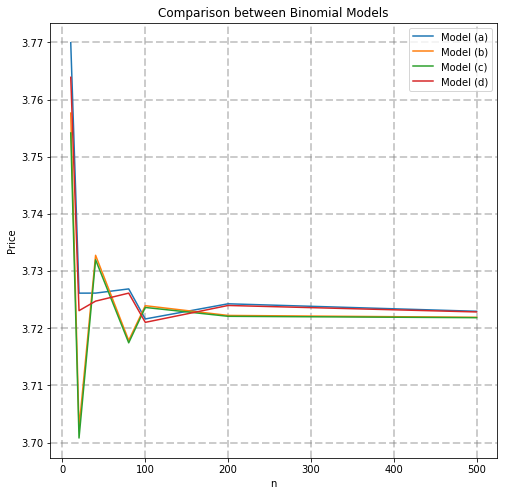

In [6]:
plt.figure(figsize=(8,8))
plt.plot(n1, p1a, n1, p1b, n1, p1c, n1,p1d);
plt.xlabel('n');
plt.ylabel('Price');
plt.title('Comparison between Binomial Models');
plt.legend(['Model (a)', 'Model (b)', 'Model (c)', 'Model (d)']);
plt.grid(color='grey', linestyle='--', linewidth=2, alpha = 0.4)
plt.show()

## P2: Google Option Price Simulation
This time we price the Option price on **GOOG**. Use risk-free rate of $2\%$ per annum, and strike price that is the closest integer to 110% of the current price. We estimate the price of the call option that expires in January of next year, using the Binomial Method. Assume **GOOG** does not pay dividends. To estimate the historical volatility, we use 60 months of historical stock price data on the company.

In [7]:
end = dt.datetime.now().date() - dt.timedelta(days = 1)
year = dt.timedelta(days = 365)
start = end - 5*year

In [8]:
from pandas_datareader.google.daily import GoogleDailyReader

@property
def url(self):
    return 'http://finance.google.com/finance/historical'

GoogleDailyReader.url = url

# get data
goog = web.get_data_google('GOOG', start, end)
cls = goog.Close
returns = (cls - cls.shift(1))/cls

In [9]:
S2_0 = cls[-1]
X2 = int(10 * round(S2_0 * 1.10 / 10.))
r2 = 0.02
sigma2 = np.std(returns) * np.sqrt(252)
n2 = 200
T2 = (dt.datetime(2019, 1, 1).date() - end) / year

c2a = binomial_a(T2, r2, sigma2, S2_0, X2, n2)

Compare Option Price with the quot from [Yahoo](https://finance.yahoo.com/quote/GOOG190118C01190000?p=GOOG190118C01190000)

/Users/AL/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/AL/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


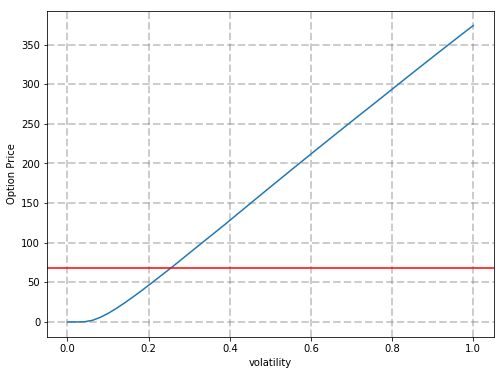

In [10]:
sigma2b = np.linspace(0,1)
c2 = lambda sigma: binomial_a(T2, r2, sigma, S2_0, X2, n2)
vc2 = np.vectorize(c2)
c2b = vc2(sigma2b)
plt.figure(figsize=(8,6))
plt.plot(sigma2b, c2b);
plt.axhline(y=67.50, color = 'r');
plt.xlabel('volatility');
plt.ylabel('Option Price');

qc2 = 67.50
sigma2bX = np.linspace(0.2, 0.3, 500)
threshold = 0.01
c2bX = np.mean(sigma2bX[np.abs(vc2(sigma2bX)-qc2) < threshold])

plt.axvline(x=c2bX, ymin=0.01, ymax=0.2, ls = '--', color = 'b' );
plt.grid(color='grey', linestyle='--', linewidth=2, alpha = 0.4);
plt.show()

The volatility that makes the estimated price equal to the market price is 24.91%. This is slightly higher than the volatility we used in the estimation before. This might due to the risk-adjusted process to evaluate the volatility. Another explainaion may comes from the different assumption of risk-free interest rate.

## P3: Greeks Estimation
We shall use Binomial Method to estimate the Greeks.

In [11]:
T3, r3, sigma3, mu3 = 0.3846, 0.03, 0.2, 0.14
S3_0, X3, n3 = 49, 50, 200
dlt3 = T3 / float(n3)
c3 = 0.5 * (np.exp(-r3 * dlt3) + np.exp((r3 + sigma3**2)*dlt3))
d3 = c3 - np.sqrt(c3**2 - 1)
u3 = 1 / d3


epsilon3 = 0.0001
f3D = lambda S0:(binomial_a(T3, r3, sigma3, S0*u3/d3, X3, n3)- binomial_a(T3, r3, sigma3, S0*d3/u3, X3, n3) ) / (S0*u3/d3 - S0*d3/u3)  
vf3D = np.vectorize(f3D)
S3_0a = np.linspace(20, 80, (80-20)//2+1)
D3a = vf3D(S3_0a)
plt.figure(figsize=(12,18))
plt.subplot(321)
plt.plot(S3_0a, D3a);
plt.title('Delta(S0)');

In [12]:
f3DT = lambda T: (binomial_a(T, r3, sigma3, S3_0+epsilon3, X3, n3)- binomial_a(T, r3, sigma3, S3_0-epsilon3, X3, n3) ) / (2*epsilon3)  
vf3DT = np.vectorize(f3DT)
T3b = np.linspace(0.0046, 0.3846, round(0.38/0.01)+1)
D3b = vf3DT(T3b)
plt.subplot(322)
plt.plot(T3b, D3b);
plt.title('Delta(T)');

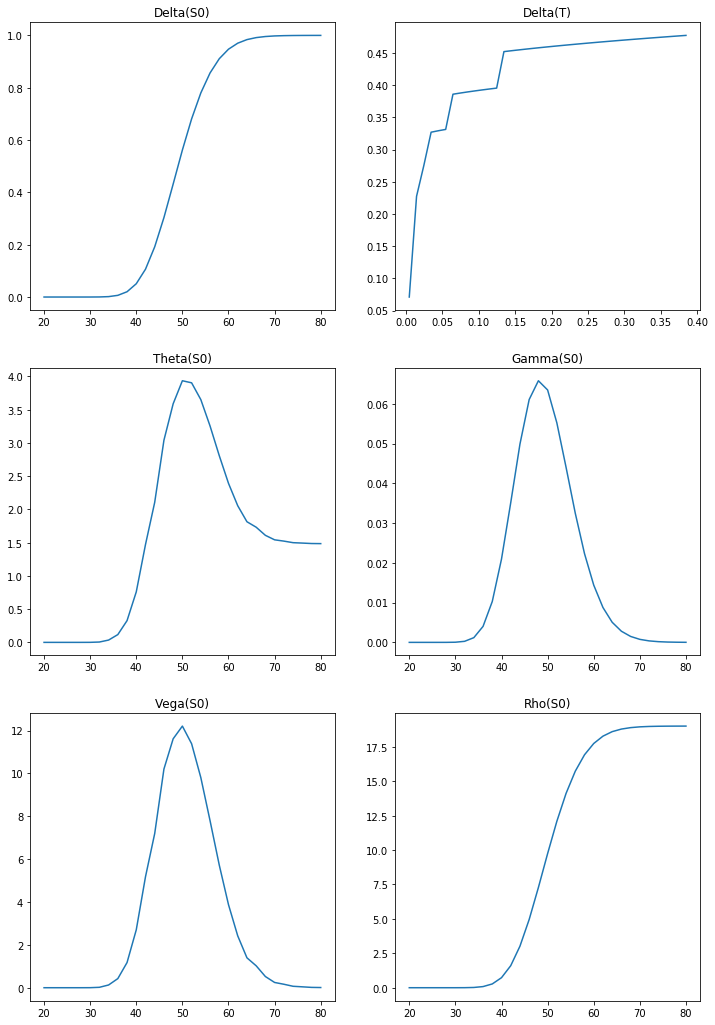

In [13]:
f3T = lambda S0: (binomial_a(T3+epsilon3, r3, sigma3, S0, X3, n3)- binomial_a(T3-epsilon3, r3, sigma3, S0, X3, n3) ) / (2*epsilon3)  
vf3T = np.vectorize(f3T)
T3c = vf3T(S3_0a)
plt.subplot(323)
plt.plot(S3_0a, T3c);
plt.title('Theta(S0)');

# due to huge error by using numerical approximation for 2nd order derivative.
f3G = lambda S0: ((binomial_a(T3, r3, sigma3, S0*u3/d3, X3, n3) - binomial_a(T3, r3, sigma3, S0, X3, n3))/(S0*u3/d3-S0) - (binomial_a(T3, r3, sigma3, S0, X3, n3)-binomial_a(T3, r3, sigma3, S0*d3/u3, X3, n3))/(S0 - S0*d3/u3)) / (0.5*(S0*u3/d3-S0*d3/u3))
vf3G = np.vectorize(f3G)
G3d = vf3G(S3_0a)
plt.subplot(324)
plt.plot(S3_0a, G3d);
plt.title('Gamma(S0)')

f3V = lambda S0: (binomial_a(T3, r3, sigma3+epsilon3, S0, X3, n3)- binomial_a(T3, r3, sigma3-epsilon3, S0, X3, n3) ) / (2*epsilon3)  
vf3V = np.vectorize(f3V)
V3e = vf3V(S3_0a)
plt.subplot(325)
plt.plot(S3_0a, V3e);
plt.title('Vega(S0)')

f3R = lambda S0: (binomial_a(T3, r3+epsilon3, sigma3, S0, X3, n3)- binomial_a(T3, r3-epsilon3, sigma3, S0, X3, n3) ) / (2*epsilon3)  
vf3R = np.vectorize(f3R)
R3f = vf3R(S3_0a)
plt.subplot(326)
plt.plot(S3_0a, R3f);
plt.title('Rho(S0)')

plt.show()

## P4: Put Option
Consider 12-month put options on a stock of company XYZ. Assume the risk-free rate is 5% per annum and the volatility of the stock price is 30 % per annum and the strike price of the option is \$100. Use a Binomial Method to estimate the prices of European and American Put options with current stock prices varying from \$80 to \$120 in increments of \$4.

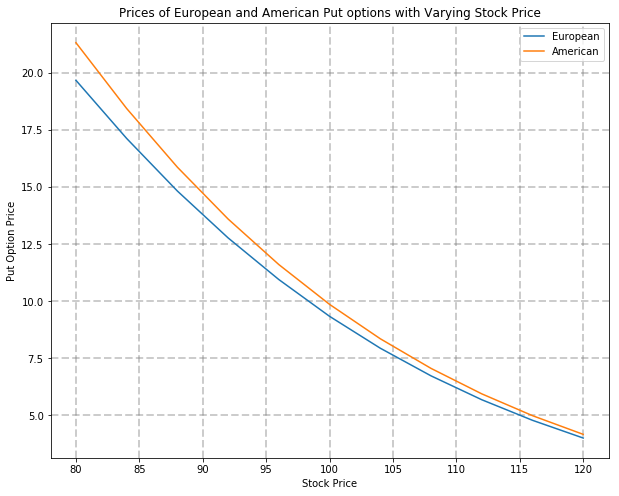

In [14]:
class StockOption(object):

    def __init__(self, S0, X, r, T, n, params):
        self.S0 = S0
        self.X = X
        self.r = r
        self.T = T
        self.n = np.maximum(1, n)
        self.STs = None  # Declare the stock prices tree

        """ Optional parameterss used by derived classes """
        self.sigma = params.get("sigma", 0)  # Volatility
        self.is_call = params.get("is_call", True)  # Call or put
        self.is_european = params.get("is_eu", True)  # Eu or Am

        """ Computed values """
        self.dt = T/float(n)  # Single time step, in years
        self.df = np.exp(-r * self.dt)  # Discount factor

class BinomialTreeOption(StockOption):

    def _setup_parameters_(self):
        c = 0.5 * (np.exp(-self.r * self.dt) + np.exp((self.r + self.sigma**2)*self.dt))
        self.d = c - np.sqrt(c**2 - 1)  # Expected value in the down state
        self.u = 1 / self.d  # Expected value in the up state
        self.qu = (np.exp(self.r*self.dt) - self.d)/(self.u-self.d)
        self.qd = 1-self.qu

    def _initialize_stock_price_tree_(self):
        # Initialize a 2D tree at T=0
        self.STs = [np.array([self.S0])]

        # Simulate the possible stock prices path
        for i in range(self.n):
            prev_branches = self.STs[-1]
            st = np.concatenate((prev_branches*self.u,
                                 [prev_branches[-1]*self.d]))
            self.STs.append(st)  # Add nodes at each time step

    def _initialize_payoffs_tree_(self):
        # The payoffs when option expires
        return np.maximum(0, (self.STs[self.n]-self.X) if self.is_call else (self.X-self.STs[self.n]))

    def __check_early_exercise__(self, payoffs, node):
        early_ex_payoff = (self.STs[node] - self.X) if self.is_call else (self.X - self.STs[node])
        return np.maximum(payoffs, early_ex_payoff)

    def _traverse_tree_(self, payoffs):
        for i in reversed(range(self.n)):
            # The payoffs from NOT exercising the option
            payoffs = (payoffs[:-1] * self.qu +
                       payoffs[1:] * self.qd) * self.df

            # Payoffs from exercising, for American options
            if not self.is_european:
                payoffs = self.__check_early_exercise__(payoffs,i)
        return payoffs

    def __begin_tree_traversal__(self):
        payoffs = self._initialize_payoffs_tree_()
        return self._traverse_tree_(payoffs)

    def price(self):
        self._setup_parameters_()
        self._initialize_stock_price_tree_()
        payoffs = self.__begin_tree_traversal__()
        return payoffs[0]

r4, sigma4 = 0.05, 0.30
T4, X4, n4 = 1., 100., 200
S4_0 = np.linspace(80, 120, (120-80)//4+1)
    
# print(BinomialTreeOption(100, X4, r4, T4, n4, {"sigma": sigma4, "is_call": False}).price())


f4a = lambda S0: BinomialTreeOption(S0, X4, r4, T4, n4, {"sigma": sigma4, "is_call": False}).price()
vf4a = np.vectorize(f4a)
p4a = vf4a(S4_0)

f4b = lambda S0: BinomialTreeOption(S0, X4, r4, T4, n4, {"sigma": sigma4, "is_call": False, "is_eu": False}).price()
vf4b = np.vectorize(f4b)
p4b = vf4b(S4_0)
plt.figure(figsize=(10, 8))
plt.plot(S4_0, p4a, S4_0, p4b);
plt.title('Prices of European and American Put options with Varying Stock Price')
plt.xlabel('Stock Price');
plt.ylabel('Put Option Price');
plt.legend(["European","American"]);
plt.grid(color='grey', linestyle='--', linewidth=2, alpha = 0.4)
plt.show() 

The American put option price is higher than the European put option price for the given stock price range. The reason behind this is the time value of money. Theoretically, the value of American put option is equals or greater than the value of European put option in that you can strike at any time and reinvest with risk-free rate.

## P5: Trinomial Method
We use the Trinomial Method to price a 6-month European Call option with the following information: the risk-free interest rate is 5\% per annum and the volatility is 24\% per annum, the current stock price is \$32 and the strike price is \$30. Divide the time interval into n parts to estimate the price of this option. Use n = 10, 15, 20, 40, 70, 80, 100, 200 and 500 to compute the approximate price and draw them in one graph, where the horizontal axis measures n, and the vertical one measures the price of the option.
* Method A applied to the stock price-process ($S_t$) is
$$
u = \frac1d, d = e^{-\sigma \sqrt{3\Delta}}, \\
p_d = \frac{r\Delta (1-u) + (r\Delta)^2 + \sigma^2 \Delta}{(u-d)(1-d)}, \\ p_u = \frac{r\Delta (1-d) + (r\Delta)^2 + \sigma^2 \Delta}{(u-d)(u-1)},\\ p_m = 1 - p_u - p_d
$$

* Method B applied to the Log-stock price-process ($X_t$) is
$$
\Delta X_u = \sigma \sqrt{3\Delta}, \Delta X_d = -\sigma \sqrt{3\Delta}\\
p_d = \frac12 \Big( \frac{\sigma^2 \Delta + (r - \frac{\sigma^2}{2})^2 \Delta^2}{\Delta X_u^2} - \frac{(r-\frac{\sigma^2}{2})\Delta}{\Delta X_u} \Big),\\ p_u = \frac12 \Big( \frac{\sigma^2 \Delta + (r - \frac{\sigma^2}{2})^2 \Delta^2}{\Delta X_u^2} + \frac{(r-\frac{\sigma^2}{2})\Delta}{\Delta X_u} \Big),\\ p_m = 1 - p_u - p_d
$$

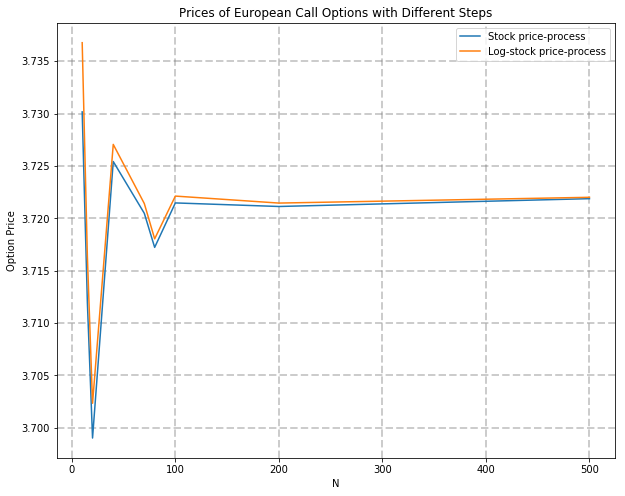

In [15]:
class TrinomialTreeOptionA(BinomialTreeOption):
    
    def _setup_parameters_(self):
        """ Required calculations for the model """
        self.d = np.exp(-self.sigma * np.sqrt(3. * self.dt))
        self.u = 1 / self.d
        self.m = 1
        
        g = (self.r * self.dt)**2 + self.sigma**2 * self.dt
        self.qu = (self.r * self.dt * (1 - self.d) + g) / ((self.u - self.d) * (self.u - 1))
        self.qd = (self.r * self.dt * (1 - self.u) + g) / ((self.u - self.d) * (1 - self.d))
        self.qm = 1 - self.qu - self.qd

    def _initialize_stock_price_tree_(self):
        """ Initialize a 2D tree at t=0 """
        self.STs = [np.array([self.S0])]

        for i in range(self.n):
            prev_nodes = self.STs[-1]
            self.ST = np.concatenate(
                (prev_nodes*self.u, [prev_nodes[-1]*self.m,
                                     prev_nodes[-1]*self.d]))
            self.STs.append(self.ST)

    def _traverse_tree_(self, payoffs):
        """ Traverse the tree backwards """
        for i in reversed(range(self.n)):
            payoffs = (payoffs[:-2] * self.qu +
                       payoffs[1:-1] * self.qm +
                       payoffs[2:] * self.qd) * self.df

            if not self.is_european:
                payoffs = self.__check_early_exercise__(payoffs,i)
        return payoffs

class TrinomialTreeOptionB(BinomialTreeOption):
    
    def _setup_parameters_(self):
        """ Required calculations for the model """
        dX =self.sigma * np.sqrt(3*self.dt)
        self.u = dX
        self.d = -dX
        self.m = 0
        
        a = self.sigma**2 * self.dt
        b = (self.r - 0.5*self.sigma**2)*self.dt
        self.qu = 0.5 * ((a + b**2)/(self.u**2) + b / self.u)
        self.qd = 0.5 * ((a + b**2)/(self.u**2) - b / self.u)
        self.qm = 1 - self.qu - self.qd

    def _initialize_stock_price_tree_(self):
        """ Initialize a 2D tree at t=0 """
        self.STs = [np.array([self.S0])]

        for i in range(self.n):
            prev_nodes = np.log(self.STs[-1])
            self.ST = np.concatenate(
                (prev_nodes + self.u, [prev_nodes[-1] + self.m,
                                     prev_nodes[-1] + self.d]))
            self.STs.append(np.exp(self.ST))

    def _traverse_tree_(self, payoffs):
        """ Traverse the tree backwards """
        for i in reversed(range(self.n)):
            payoffs = (payoffs[:-2] * self.qu +
                       payoffs[1:-1] * self.qm +
                       payoffs[2:] * self.qd) * self.df

            if not self.is_european:
                payoffs = self.__check_early_exercise__(payoffs,i)
        return payoffs
    
T5, r5, sigma5 = 0.5, 0.05, 0.24
S5_0, X5 = 32., 30.
n5 = np.array([10,15,20,40,70,80,100,200,500])

f5a = lambda n: TrinomialTreeOptionA(S5_0, X5, r5, T5, n, {"sigma": sigma5}).price()
vf5a = np.vectorize(f5a)
p5a = vf5a(n5)

f5b = lambda n: TrinomialTreeOptionB(S5_0, X5, r5, T5, n, {"sigma": sigma5}).price()
vf5b = np.vectorize(f5b)
p5b = vf5b(n5)


plt.figure(figsize=(10, 8))
plt.plot(n5, p5a, n5, p5b);
plt.title('Prices of European Call Options with Different Steps')
plt.xlabel('N');
plt.ylabel('Option Price');
plt.legend(["Stock price-process","Log-stock price-process"]);
plt.grid(color='grey', linestyle='--', linewidth=2, alpha = 0.4)
plt.show() 

## P6: Halton's Low-Discrepancy Sequence to Price European Call Option
We use Halton’s Low-Discrepancy Sequences to price European call options. The code should be generic: it will ask for the user inputs for $S_0, K, T, r, \sigma, N$ (number of points) and $b_1$ (base 1) and $b_2$ (base 2). Box-Muller method used to generate Normals such as:

$$
Z_1 = \sqrt{-2ln(H_1)}cos(2\pi H_2)\\
Z_2 = \sqrt{-2ln(H_1)}sin(2\pi H_2)
$$

where $H_1 and H_2$ will be the Halton’s numbers with base $b_1$ and base $b_2$ accordingly.

In [16]:
def vdc(n, base):
    vdc, denom = 0, 1
    while n:
        denom *= base
        n, remainder = divmod(n, base)
        vdc += remainder/float(denom)
    return vdc

def halton_sequence(size, dim, baseComb):
    seq = []
    for d in baseComb:
        base = d
        seq.append([vdc(i, base) for i in range(size)])
    return seq

def HaltonEuroCall(S0, X, T, r, sigma, n, b1, b2):
    HS = np.asarray(halton_sequence(n+1, 2, [b1, b2]))
    HS = HS[:, 1:]
    Z1 = np.multiply(np.sqrt(-2*np.log(HS[0])), np.cos(2*np.math.pi * HS[1]))
    Z2 = np.multiply(np.sqrt(-2*np.log(HS[0])), np.sin(2*np.math.pi * HS[1]))
    rho = -0.7
    x = Z1
    y = (rho * Z1 + np.sqrt(1 - rho**2) * Z2)
    St1 = S0*np.exp((r-0.5*sigma**2)*T + sigma*np.sqrt(T)* x)
    St2 = S0*np.exp((r-0.5*sigma**2)*T + sigma*np.sqrt(T)* y)
    payoff1 = np.maximum(0, St1 - X)
    payoff2 = np.maximum(0, St2 - X)
    payoff = (payoff1 + payoff2) / 2.
    price = np.sum(payoff)/float(n)*np.exp(-r*T)
    return price

# Now we use a test case
S6_0, X6= 100., 110.
T6, r6, sigma6, n6 = 1., 0.05, 0.2, 5000
base1, base2 = 2, 7
C6 = HaltonEuroCall(S6_0, X6, T6, r6, sigma6, n6, base1, base2)
print('The price of European call option of the above sample is {C6:f}.'.format(C6 = C6))

The price of European call option of the above sample is 6.048399.
